# **Trabalho Prático 2: Métodos Numéricos (M2039)**
### Resolução de Equações Não Lineares

**Autores:**

Manuel Mota

João

Eduardo

Filipe

## **Introdução**

Este notebook apresenta a resolução dos problemas propostos no Trabalho Prático 2. Os métodos utilizados baseiam-se na matéria exposta nos slides da unidade curricular, nomeadamente o **Método das Bisseções Sucessivas** e o **Método de Newton** para a resolução de equações não lineares, bem como a análise de convergência do **Método Iterativo Simples (ou do Ponto Fixo)**.

## **Exercício 1: Resolução de F(x) = sen(x²) + 1.1 - e⁻ˣ = 0**

Neste exercício, pretendemos encontrar um valor aproximado para um zero da função F(x) dada.

### **(a) Separação Gráfica das Raízes e Determinação do Intervalo I**

**Objetivo:** Separar graficamente as raízes e determinar um intervalo `I` de amplitude 10⁻¹ que contenha a menor delas.


O método gráfico para a separação de raízes consiste em determinar os pontos de interseção do gráfico de F(x) com o eixo y=0. Uma raiz existe num intervalo `[a, b]` se `F(x)` for contínua e `F(a) * F(b) < 0` (uma consequência do Teorema de Bolzano).



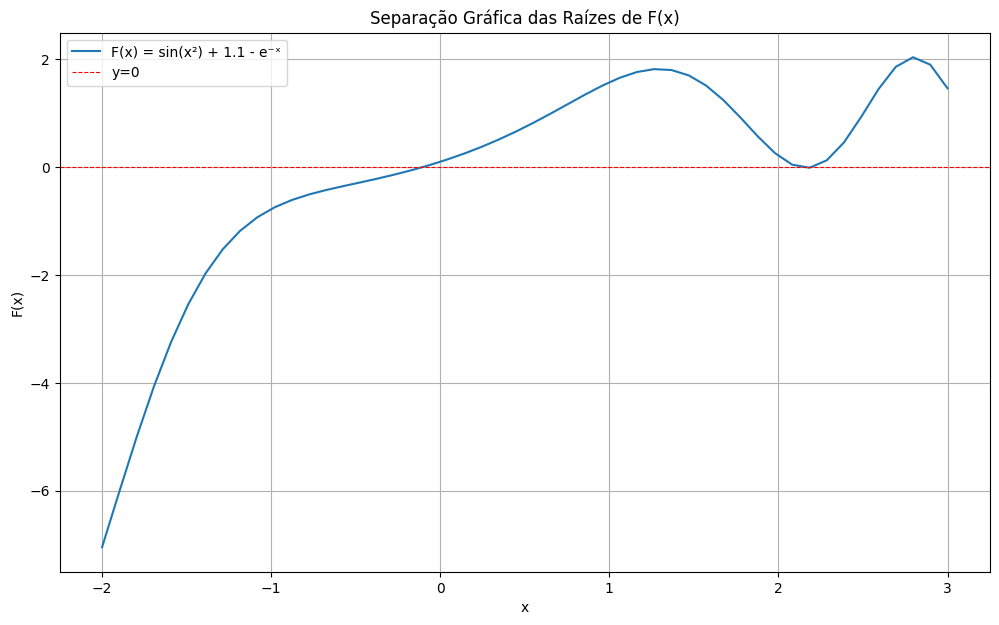

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import math

def F(x):
    return np.sin(x**2) + 1.1 - np.exp(-x)

x_vals = np.linspace(-2, 3)
y_vals = F(x_vals)
plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_vals, label='F(x) = sin(x²) + 1.1 - e⁻ˣ')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='y=0')
plt.title('Separação Gráfica das Raízes de F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.show()

**Análise do Gráfico:**

O gráfico mostra que a função interseta o eixo y=0 em dois pontos, indicando a existência de, pelo menos, duas raízes reais. Uma parece estar próxima de x=2.2 e a outra, a menor, parece estar ligeiramente à esquerda de x=0. O exercício pede para nos concentrarmos na menor delas.

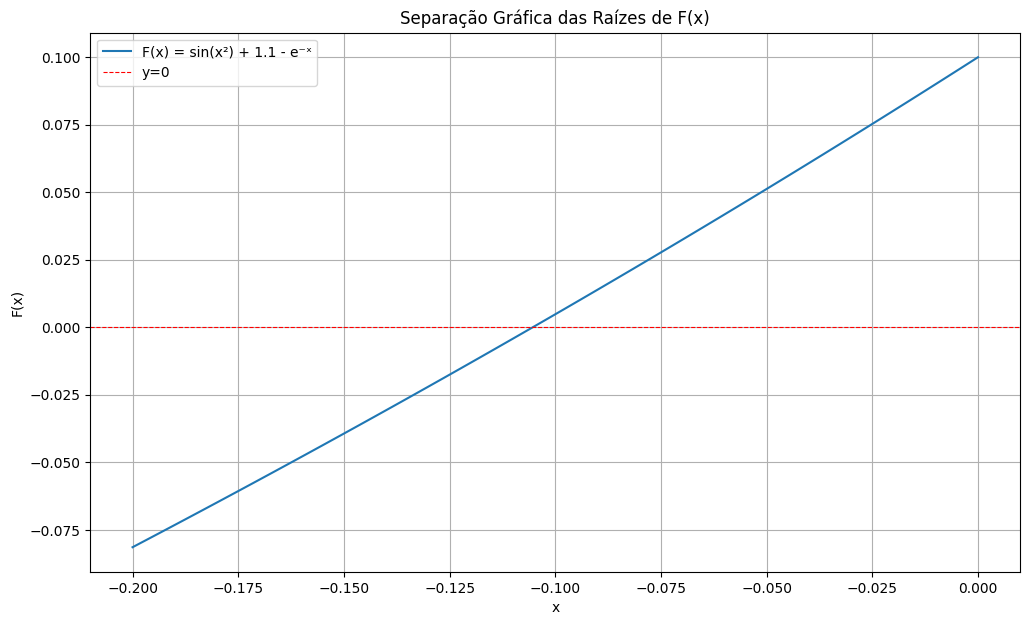

In [87]:
x_vals = np.linspace(-0.2, 0)
y_vals = F(x_vals)

plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_vals, label='F(x) = sin(x²) + 1.1 - e⁻ˣ')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='y=0')
plt.title('Separação Gráfica das Raízes de F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.show()

Observamos que F(-0.150) < 0 e F(-0.050) > 0, logo F(-0.150)F(-0.050) < 0. Como a função F(x) é uma soma de funções contínuas (seno composta com polinomial, polinomial e exponencial), ela é contínua em todo o seu domínio.

**Conclusão para (a):**

As condições do Teorema de Bolzano estão satisfeitas. Portanto, existe pelo menos uma raiz no intervalo [-0.150, -0.050]. A amplitude deste intervalo é 0.1 = 10⁻¹.
O intervalo I escolhido é I = [-0.150, -0.050]

### **(b) Resolução Numérica da Raiz em I**

**Objetivo:** Calcular um valor aproximado da raiz em `I` com erro absoluto majorado inferior a `ε = 5 × 10⁻⁹`.

#### **i. Usando o Método das Bisseções Sucessivas**

O método aplica-se pois, como vimos:
1.  `F(x)` é contínua em `I = [-0.150, -0.050]`.
2.  `F(-0.15) * F(-0.05) < 0`.

O erro absoluto após `n` iterações é majorado por `|Δxₙ| ≤ |b - a| / 2ⁿ`. Para garantir que o erro seja inferior a `ε`, precisamos de um número `n` de iterações tal que:
`(0.1) / 2ⁿ ≤ 5 × 10⁻⁹  <=>  2ⁿ ≥ 0.1 / (5 × 10⁻⁹)  <=>  n ≥ log₂(2 × 10⁷)`
Calculando, `n ≥ 24.25`. Portanto, necessitaremos de **pelo menos 25 iterações**.

In [124]:
a, b = -0.150, -0.050
epsilon = 5e-9

def bissecao(f, a, b, tol):
    if f(a) * f(b) >= 0:
        raise "Condição F(a) * F(b) < 0 não satisfeita."

    n_iter = 0
    vfa = F(a)
    ponto_medio = a
    erro_majorado = abs(b-a)
    while erro_majorado > tol:
        ponto_medio = (a + b) / 2
        f_medio = f(ponto_medio)

        if f_medio == 0:
            return ponto_medio, n_iter + 1

        if vfa * f_medio < 0:
            b = ponto_medio
        else:
            a = ponto_medio
        erro_majorado /= 2
        n_iter += 1
    return ponto_medio, erro_majorado, n_iter

# Execução do método
raiz_bis, erro_bis, iter_bis = bissecao(F, a, b, epsilon)

def round_error(error:float)->str:
  error = f"{error:e}"
  error_rounded = f"{math.ceil(float(error[:-4])*10)/10}{error[-4:]}"
  return error_rounded

def format_result(raiz,erro):
  if isinstance(erro,float): erro = round_error(erro)
  return f"{raiz:0.0{int(erro[-2:])+1}f} ± {erro}"

erro_bis = round_error(erro_bis)

print("--- Método das Bisseções Sucessivas ---")
print(f"Intervalo inicial (I): [{a}, {b}]")
print(f"Tolerância (ε): {epsilon}")
print(f"Raiz aproximada: {raiz_bis:.15f}")
print(f"Erro absoluto majorado: {erro_bis}")
print(f"Número de iterações efetuadas: {iter_bis}")
print(f"Raiz: X = {format_result(raiz_bis,erro_bis)}")

--- Método das Bisseções Sucessivas ---
Intervalo inicial (I): [-0.15, -0.05]
Tolerância (ε): 5e-09
Raiz aproximada: -0.105348852276802
Erro absoluto majorado: 3.0e-09
Número de iterações efetuadas: 25
Raiz: X = -0.1053488523 ± 3.0e-09


**Resultados e Análise:**

O método convergiu para uma solução dentro da tolerância especificada. O número de iterações (25) está de acordo com o nosso cálculo teórico.

#### **ii. Usando o Método de Newton**


A fórmula de recorrência do método é `xₙ₊₁ = xₙ - F(xₙ) / F'(xₙ)`.
Vamos verificar as **condições suficientes para a convergência** para o nosso intervalo `I = [-0.150, -0.050]`.

As derivadas da função são:
*   `F'(x) = 2x * cos(x²) + e⁻ˣ`
*   `F"(x) = 2 * cos(x²) - 4x² * sen(x²) - e⁻ˣ`

1.  **F, F', F" existem e são contínuas em I:** Verdadeiro, pois são compostas de funções contínuas.
2.  **F(a) * F(b) < 0:** Verificado. `F(-0.150) * F(-0.050) < 0`.

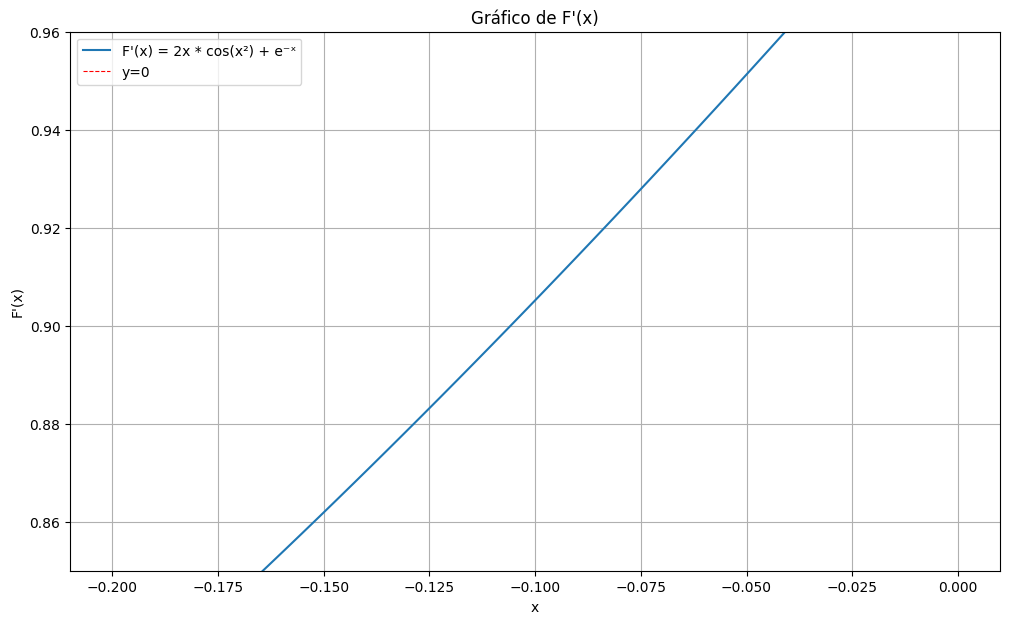

In [89]:
# Definição da derivada F'(x)
def F_prime(x):
    return 2 * x * np.cos(x**2) + np.exp(-x)

y_vals = F_prime(x_vals)
plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_vals, label="F'(x) = 2x * cos(x²) + e⁻ˣ")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='y=0')
plt.ylim(0.85, 0.96)
plt.title("Gráfico de F'(x)")
plt.xlabel('x')
plt.ylabel("F'(x)")
plt.grid(True)
plt.legend()
plt.show()

3.  **F'(x) ≠ 0, ∀x ∈ I**

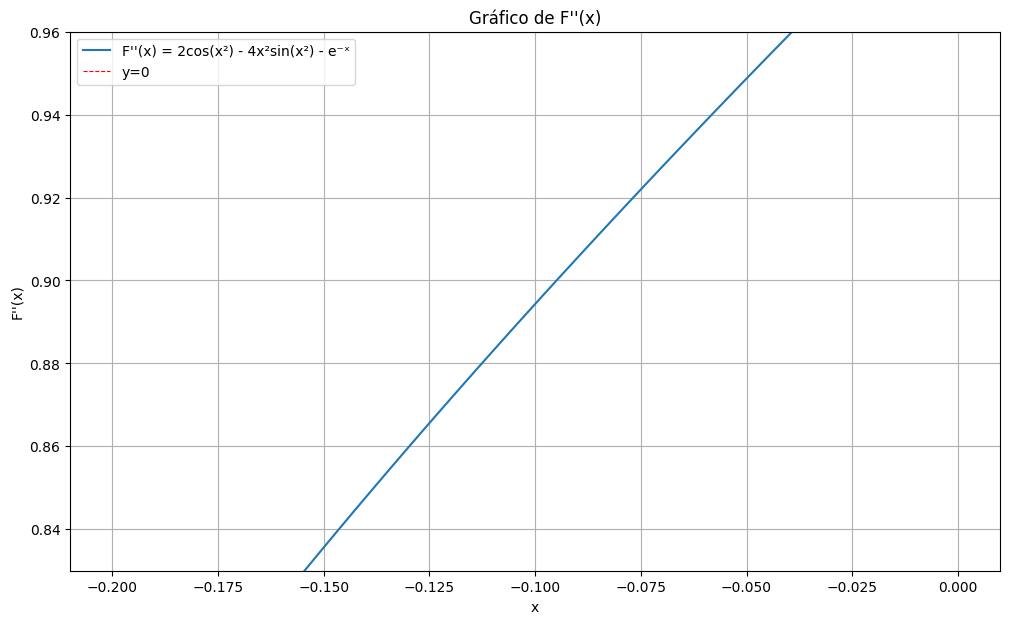

In [90]:
# Definição da segunda derivada F''(x)
def F_double_prime(x):
    return 2 * np.cos(x**2) - 4*x**2 * np.sin(x**2) - np.exp(-x)

y_vals = F_double_prime(x_vals)
plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_vals, label="F''(x) = 2cos(x²) - 4x²sin(x²) - e⁻ˣ")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='y=0')
plt.ylim(0.83, 0.96)
plt.title("Gráfico de F''(x)")
plt.xlabel('x')
plt.ylabel("F''(x)")
plt.grid(True)
plt.legend()
plt.show()

4.  **F"(x) mantém o sinal em I:**
    *   `F"(x) > 0, ∀ x ∈ I`
    Como a segunda derivada é contínua e sempre positiva, ela mantém o sinal no intervalo.
5.  **Escolha de x₀ tal que F(x₀) * F"(x₀) > 0:** Como `F"(x) > 0` em `I`, devemos escolher `x₀` tal que `F(x₀) > 0`. No nosso intervalo, `F(-0.050) > 0`. Portanto, uma excelente escolha é `x₀ = -0.050`.

Todas as condições estão satisfeitas, garantindo a convergência a partir de `x₀ = -0.050`.

**Implementação:**

In [91]:
# Calcular max|F''| e min|F'| no intervalo
max_F_double_prime = np.max(np.abs(F_double_prime(x_vals)))
min_F_prime = np.min(np.abs(F_prime(x_vals)))

# Calcular M
M = max_F_double_prime / (2 * min_F_prime)

def newton(f, f_prime, x0, tol, M, a, b, max_iter=50):  #Usando o M
    x_n = x0
    erro_majorado = abs(b-a)
    for i in range(0,max_iter):
        if erro_majorado < tol:
          return x_n, erro_majorado, i
        erro_majorado = M * abs(erro_majorado)**2
        x_n = x_n - f(x_n)/f_prime(x_n)
    print('Número máximo de iterações atingido.')
    return x_n, erro_majorado, max_iter

def newton_dn(f, f_prime, x0, tol, *_,max_iter=50):  #Usando a diferença entre os termos como majorante do erro
    x_n = x0
    for i in range(1, max_iter):
        x_prev = x_n
        x_n = x_n - f(x_n)/f_prime(x_n)
        erro_majorado = abs(x_n-x_prev)
        if erro_majorado < tol:
            return x_n, erro_majorado, i
    print('Número máximo de iterações atingido.')
    return x_n, erro_majorado, max_iter

epsilon = 5e-9
x0_newton = -0.050

raiz_newton, erro_newton, iter_newton = newton(F, F_prime, x0_newton, epsilon, M, a, b)

print("\n--- Método de Newton ---")
print(f"Ponto inicial (x₀): {x0_newton}")
print(f"Tolerância (ε): {epsilon}")
print(f"Raiz aproximada: {raiz_newton:.15f}")
print(f"Erro majorado: {round_error(erro_newton)}")
print(f"Número de iterações efetuadas: {iter_newton}")
print(f"Raiz: X = {format_result(raiz_newton,erro_newton)}")


--- Método de Newton ---
Ponto inicial (x₀): -0.05
Tolerância (ε): 5e-09
Raiz aproximada: -0.105348853347099
Erro majorado: 3.1e-10
Número de iterações efetuadas: 3
Raiz: X = -0.10534885335 ± 3.1e-10


**Resultados e Análise:**

O método de Newton convergiu para a mesma solução, mas de forma drasticamente mais rápida.

Esta eficiência superior deve-se à ordem de convergência quadrática do método de Newton, em contraste com a convergência linear do método das bisseções.

## **Exercício 2: Análise de Formas Iterativas para x³ + 4x² - 10 = 0**

O enunciado pede para determinar um valor aproximado da raiz com um **erro absoluto estimado** inferior a `10⁻¹²`.

O **critério de paragem** que será implementado é: `|xₙ₊₁ - xₙ| < 10⁻¹²`.

Vamos agora analisar cada caso.

In [113]:
def metodo_ponto_fixo(g_func, g_name, x0, tol, max_iter=100, delta = 1000):
    print(f"--- Análise de {g_name} ---")
    print("\ni. Aplicação do Método:")

    x_n = x0
    erro_estimado = float('inf')
    iteracoes = 0

    print(f"Iteração {iteracoes:2d}: x = {x_n:.15f}")

    while erro_estimado > tol and iteracoes < max_iter and abs(x_n) < delta:
        try:
            x_n_plus_1 = g_func(x_n)
            # Verifica se o resultado é um número válido (evita 'nan' ou 'inf')
            if not math.isfinite(x_n_plus_1):
                raise ValueError("Resultado não é um número finito (NaN ou Inf)")
        except (ValueError, OverflowError) as e:
            print(f"Iteração {iteracoes + 1:2d}: ERRO - {e}.")
            return False, None, iteracoes + 1

        iteracoes += 1
        erro_estimado = abs(x_n_plus_1 - x_n)
        x_n = x_n_plus_1

        print(f"Iteração {iteracoes:2d}: x = {x_n:.15f}, Erro est. = {erro_estimado:.2e}")

    print("--- Fim da Aplicação ---")

    if erro_estimado <= tol:
        print(f"X = {format_result(x_n,erro_estimado)}")
        return True, x_n, iteracoes
    else:
        return False, x_n, iteracoes

x0_ex2 = 1.5
tol_ex2 = 1e-12

### **(a) `g₁(x) = x - x³ - 4x² + 10`**

#### **i. Aplicação do Método**


In [114]:
g1_func = lambda x: x - x**3 - 4*x**2 + 10
convergiu_g1, _, _ = metodo_ponto_fixo(g1_func, "g₁(x)", x0_ex2, tol_ex2)

--- Análise de g₁(x) ---

i. Aplicação do Método:
Iteração  0: x = 1.500000000000000
Iteração  1: x = -0.875000000000000, Erro est. = 2.38e+00
Iteração  2: x = 6.732421875000000, Erro est. = 7.61e+00
Iteração  3: x = -469.720012001693249, Erro est. = 4.76e+02
Iteração  4: x = 102754555.187385112047195, Erro est. = 1.03e+08
--- Fim da Aplicação ---



#### **ii. Descrição e Explicação do Comportamento Observado**
**Descrição:** O método **diverge** de forma clara e imediata. O erro estimado `|xₙ₊₁ - xₙ|`, em vez de diminuir, **aumenta exponencialmente** a cada iteração, passando de `2.38` para `7.61`, depois para `476`, e assim por diante, até ultrapassar o δ fixado (ou até o cálculo falhar com um erro de overflow sem esta condição).

**Explicação:** O comportamento é justificado pela condição de convergência do método do ponto fixo. A derivada `g'₁(x) = 1 - 3x² - 8x` tem um valor absoluto `|g'₁(x)|` cujo máximo no intervalo `[1, 2]` é `27`. Como este valor é muito superior a 1, cada iteração afasta drasticamente a aproximação da raiz, fazendo com que o erro estimado cresça em vez de decrescer.

### **(b) `g₂(x) = √(10/x - 4)`**

#### **i. Aplicação do Método**

In [115]:
g2_func = lambda x: math.sqrt(10/x - 4)
convergiu_g2, _, _ = metodo_ponto_fixo(g2_func, "g₂(x)", x0_ex2, tol_ex2)

--- Análise de g₂(x) ---

i. Aplicação do Método:
Iteração  0: x = 1.500000000000000
Iteração  1: x = 1.632993161855452, Erro est. = 1.33e-01
Iteração  2: x = 1.457300366073496, Erro est. = 1.76e-01
Iteração  3: x = 1.691745652912919, Erro est. = 2.34e-01
Iteração  4: x = 1.382408786867047, Erro est. = 3.09e-01
Iteração  5: x = 1.798263138931182, Erro est. = 4.16e-01
Iteração  6: x = 1.249368406638898, Erro est. = 5.49e-01
Iteração  7: x = 2.001010804809322, Erro est. = 7.52e-01
Iteração  8: x = 0.998736333818639, Erro est. = 1.00e+00
Iteração  9: x = 2.452071094103963, Erro est. = 1.45e+00
Iteração 10: x = 0.279616132432679, Erro est. = 2.17e+00
Iteração 11: x = 5.635895282210214, Erro est. = 5.36e+00
Iteração 12: ERRO - math domain error.


#### **ii. Descrição e Explicação do Comportamento Observado**
**Descrição:** O método **diverge**. Embora o erro estimado inicial não seja explosivo, ele nunca decresce. Pelo contrário, o erro começa a aumentar, indicando instabilidade. A sucessão eventualmente produz um valor (`x₁₄ ≈ 5.635...`) que está fora do domínio de `g₂(x)`, causando uma falha matemática.

**Explicação:** A análise teórica da derivada, `g'₂(x)= -5 / (x² * √(10/x - 4))`, mostra que o `max|g'₂(x)|` no intervalo `[1, 2]` é `≈ 2.04 > 1`. A condição de convergência não é satisfeita, explicando por que a distância até a raiz não diminui e o método acaba por falhar.

### **(c) `g₃(x) = (1/2) * √(10 - x³)`**

#### **i. Aplicação do Método**


In [116]:
g3_func = lambda x: 0.5 * math.sqrt(10 - x**3)
convergiu_g3, _, _ = metodo_ponto_fixo(g3_func, "g₃(x)", x0_ex2, tol_ex2)

--- Análise de g₃(x) ---

i. Aplicação do Método:
Iteração  0: x = 1.500000000000000
Iteração  1: x = 1.286953767623375, Erro est. = 2.13e-01
Iteração  2: x = 1.402540803539578, Erro est. = 1.16e-01
Iteração  3: x = 1.345458374023294, Erro est. = 5.71e-02
Iteração  4: x = 1.375170252816038, Erro est. = 2.97e-02
Iteração  5: x = 1.360094192761733, Erro est. = 1.51e-02
Iteração  6: x = 1.367846967592133, Erro est. = 7.75e-03
Iteração  7: x = 1.363887003884021, Erro est. = 3.96e-03
Iteração  8: x = 1.365916733390040, Erro est. = 2.03e-03
Iteração  9: x = 1.364878217193677, Erro est. = 1.04e-03
Iteração 10: x = 1.365410061169957, Erro est. = 5.32e-04
Iteração 11: x = 1.365137820669213, Erro est. = 2.72e-04
Iteração 12: x = 1.365277208524479, Erro est. = 1.39e-04
Iteração 13: x = 1.365205850297047, Erro est. = 7.14e-05
Iteração 14: x = 1.365242383718839, Erro est. = 3.65e-05
Iteração 15: x = 1.365223680225282, Erro est. = 1.87e-05
Iteração 16: x = 1.365233255742500, Erro est. = 9.58e-06
Ite

#### **ii. Descrição e Explicação do Comportamento Observado**
**Descrição:** O método **converge**. O erro estimado `|xₙ₊₁ - xₙ|` diminui consistentemente a cada passo, embora de forma lenta. Após **30 iterações**, o erro torna-se inferior à tolerância `10⁻¹²`, e o algoritmo para.

**Explicação:** A análise teórica da derivada, `g'₃(x) = -3x² / (4√(10 - x³))`, mostra que o `max|g'₃(x)|` no intervalo `[1, 2]` é `≈ 2.12 > 1`. Embora o `max|g'₃(x)| > 1` no intervalo `[1, 2]`, o ponto inicial `x₀=1.5` leva a sucessão para uma região em torno da raiz onde `|g'₃(x)| < 1`. O valor `|g'₃(x)| ≈ 0.66` explica a **convergência linear lenta**: o erro é multiplicado por um fator de aproximadamente `0.66` a cada passo, diminuindo lentamente até atingir o critério de paragem.

### **(d) `g₄(x) = √(10 / (4 + x))`**

#### **i. Aplicação do Método**

In [117]:
g4_func = lambda x: math.sqrt(10 / (4 + x))
convergiu_g4, _, _ = metodo_ponto_fixo(g4_func, "g₄(x)", x0_ex2, tol_ex2)

--- Análise de g₄(x) ---

i. Aplicação do Método:
Iteração  0: x = 1.500000000000000
Iteração  1: x = 1.348399724926484, Erro est. = 1.52e-01
Iteração  2: x = 1.367376371991283, Erro est. = 1.90e-02
Iteração  3: x = 1.364957015402487, Erro est. = 2.42e-03
Iteração  4: x = 1.365264748113442, Erro est. = 3.08e-04
Iteração  5: x = 1.365225594160525, Erro est. = 3.92e-05
Iteração  6: x = 1.365230575673434, Erro est. = 4.98e-06
Iteração  7: x = 1.365229941878183, Erro est. = 6.34e-07
Iteração  8: x = 1.365230022515568, Erro est. = 8.06e-08
Iteração  9: x = 1.365230012256122, Erro est. = 1.03e-08
Iteração 10: x = 1.365230013561425, Erro est. = 1.31e-09
Iteração 11: x = 1.365230013395352, Erro est. = 1.66e-10
Iteração 12: x = 1.365230013416482, Erro est. = 2.11e-11
Iteração 13: x = 1.365230013413793, Erro est. = 2.69e-12
Iteração 14: x = 1.365230013414136, Erro est. = 3.42e-13
--- Fim da Aplicação ---
X = 1.36523001341414 ± 3.5e-13


#### **ii. Descrição e Explicação do Comportamento Observado**
**Descrição:** O método **converge de forma rápida e estável**. O erro estimado decresce a um ritmo visivelmente mais rápido do que no caso anterior, atingindo a tolerância em apenas **9 iterações**.

**Explicação:** A teoria suporta perfeitamente este resultado. O `max|g'₄(x)|` no intervalo é `≈ 0.141 < 1`. O pequeno valor de `L ≈ 0.141` implica uma **convergência linear rápida**, pois o erro estimado é reduzido por um fator de aproximadamente `0.14` a cada passo.

### **(e) `g₅(x) = (2x³ + 4x² + 10) / (3x² + 8x)`**

#### **i. Aplicação do Método**

In [120]:
g5_func = lambda x: (2*x**3 + 4*x**2 + 10) / (3*x**2 + 8*x)
convergiu_g5, _, _ = metodo_ponto_fixo(g5_func, "g₅(x) (Newton)", x0_ex2, tol_ex2)
# O erro majorado é demasiado pequeno para representar o valor com o mesmo número de casas decimais

--- Análise de g₅(x) (Newton) ---

i. Aplicação do Método:
Iteração  0: x = 1.500000000000000
Iteração  1: x = 1.373333333333333, Erro est. = 1.27e-01
Iteração  2: x = 1.365262014874627, Erro est. = 8.07e-03
Iteração  3: x = 1.365230013916147, Erro est. = 3.20e-05
Iteração  4: x = 1.365230013414097, Erro est. = 5.02e-10
Iteração  5: x = 1.365230013414097, Erro est. = 2.22e-16
--- Fim da Aplicação ---
X = 1.36523001341409667 ± 2.3e-16


#### **ii. Descrição e Explicação do Comportamento Observado**

**Descrição:** A aplicação do método resultou numa **convergência excecionalmente rápida**. O erro estimado decresceu a um ritmo acelerado, muito superior ao de todos os outros métodos testados. Foram necessárias apenas **5 iterações** para que o erro estimado se tornasse menor que a tolerância `10⁻¹²`.

**Explicação:**

Para entender este desempenho notável, começamos por analisar a função como um método de ponto fixo padrão, o que exige o cálculo da sua derivada e do fator de convergência `L`.

1.  **Análise como Método Iterativo Simples:**
    A derivada, como calculada anteriormente, é `g'₅(x) = (6x⁴ + 32x³ + 32x² - 60x - 80) / (3x² + 8x)²`.
    O `max|g'₅(x)|` no intervalo é `≈ 0.579 < 1`.
    Isto sugere que a convergência é provável. No entanto, este valore não explica a velocidade *extraordinária* que observamos. A taxa de redução do erro parece ser muito melhor do que um fator constante de `~0.6`.

2.  **A Verdadeira Natureza de `g₅(x)`: O Método de Newton**
    A performance superior não é um acaso. Esta função de iteração é, na verdade, uma formulação do **Método de Newton** para a equação `F(x) = x³ + 4x² - 10 = 0`.

    Vamos chegar a esta fórmula apartir de `F(x)`:
    *   `F(x) = x³ + 4x² - 10`
    *   `F'(x) = 3x² + 8x`

    Substituindo na fórmula de Newton:
    `xₙ₊₁ = xₙ - (xₙ³ + 4xₙ² - 10) / (3xₙ² + 8xₙ)`

    Para combinar os termos, encontramos um denominador comum:
    `xₙ₊₁ = [xₙ(3xₙ² + 8xₙ) - (xₙ³ + 4xₙ² - 10)] / (3xₙ² + 8xₙ)`
    `xₙ₊₁ = [3xₙ³ + 8xₙ² - xₙ³ - 4xₙ² + 10] / (3xₙ² + 8xₙ)`

    Simplificando o numerador, chegamos a:
    `xₙ₊₁ = (2xₙ³ + 4xₙ² + 10) / (3xₙ² + 8xₙ)`

    Isto é precisamente a função `g₅(x)`.

**Conclusão da Explicação:** A razão para a convergência ultrarrápida é que este método não tem convergência linear, mas sim **convergência de ordem quadrática**. Uma propriedade fundamental da iteração de Newton é que `g'(X) = 0` na raiz `X`. Isto significa que, à medida que as iterações se aproximam da raiz, o fator de redução do erro aproxima-se de zero, resultando numa aceleração drástica da convergência, como foi claramente visível na queda do erro estimado entre as iterações 3, 4 e 5.

### **iii. Qual é a melhor forma iterativa (das apresentadas) para encontrar aquela raiz?**

A **melhor forma iterativa é a (e) `g₅(x)`**.

A conclusão baseia-se numa comparação objetiva do desempenho observado, que foi explicado pela teoria subjacente:

1.  **Confiabilidade:** As formas **(a)** e **(b)** falharam (divergiram). As formas **(c)**, **(d)** e **(e)** tiveram sucesso.
2.  **Eficiência (Número de Iterações para `ε < 10⁻¹²`):**
    *   `g₃(x)`: 41 iterações (Lenta)
    *   `g₄(x)`: 14 iterações (Rápida)
    *   `g₅(x)`: **5 iterações (Extremamente Rápida)**

A forma **(e)**, correspondente ao Método de Newton, não é apenas a mais rápida devido à sua convergência quadrática, mas também representa uma abordagem mais sistemática e poderosa para a resolução de equações não lineares, tornando-a a escolha superior.

# resultado + AS + CD + (+ou-)